In [11]:
# 1. IMPORTING PACKAGES

import requests                     
import pandas as pd        
import numpy as np
import time                         
import uuid
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
# 2. DEFINING BASKET LEGS

API_KEY = 'YOUR SPIDERROCK API KEY'
MLINK_PROD_URL = 'https://mlink-live.nms.saturn.spiderrockconnect.com/rest/json'
basket_id = 112345

def build_option_leg_payload(
    symbol, expiry, strike, cp, 
    basket_id, okey_number, 
    vol=None, uprc=None, rate=None
):
    payload = {
        "header": {
            "mTyp": "OptionItemDef"
        },
        "message": {
            "pkey": {
                "okey": {
                    "at": "EQT",
                    "ts": "NMS",
                    "tk": symbol,
                    "dt": expiry,
                    "xx": strike,
                    "cp": cp
                },
                "okeyNumber": okey_number,
                "basketNumber": basket_id,
                "userName": "indv.nadithyan"
            },
            "exType": "American",
            "exTime": "PM",
            "holidayCalendar": "NYSE",
            "timeMetric": "D252",
            "priceType": "Equity",
            "modelType": "LogNormalExact",
            "incGreeks": "Yes"
#            "timestamp": datetime.utcnow().strftime("%Y-%m-%d %H:%M:%S.%f")[:-3]
        }
    }

    if vol is not None:
        payload["message"]["vol"] = vol
    if uprc is not None:
        payload["message"]["uPrc"] = uprc
    if rate is not None:
        payload["message"]["rate"] = rate

    return payload

params = {
    "apiKey": API_KEY,
    "cmd": "postmsgs",
    "postaction": "I",
    "postmerge": "Y"
}

# Leg 1: Long Put @ 10% below current price (assume SPY @ 500 → strike 450)
put_payload = {
    "header": {
        "mTyp": "OptionItemDef"
    },
    "message": {
        "pkey": {
            "okey": {
                "at": "EQT",
                "ts": "NMS",
                "tk": "SPY",
                "dt": "2025-09-04",
                "xx": 450,
                "cp": "Put"
            },
            "okeyNumber": 1,
            "basketNumber": basket_id,
            "userName": "indv.nadithyan"
        },
        "exType": "American",
        "exTime": "PM",
        "holidayCalendar": "NYSE",
        "timeMetric": "D252",
        "priceType": "Equity",
        "modelType": "LogNormalExact",
        "incGreeks": "Yes",
        "vol": 0.25,
        "uPrc": 500,
        "rate": 0.05
#        "timestamp": datetime.utcnow().strftime("%Y-%m-%d %H:%M:%S.%f")
    }
}


# Leg 2: Short Call @ 15% above current price → strike 575
call_payload = {
    "header": {
        "mTyp": "OptionItemDef"
    },
    "message": {
        "pkey": {
            "okey": {
                "at": "EQT",
                "ts": "NMS",
                "tk": "SPY",
                "dt": "2025-09-04",
                "xx": 575,
                "cp": "Call"
            },
            "okeyNumber": 2,
            "basketNumber": basket_id,
            "userName": "indv.nadithyan"
        },
        "exType": "American",
        "exTime": "PM",
        "holidayCalendar": "NYSE",
        "timeMetric": "D252",
        "priceType": "Equity",
        "modelType": "LogNormalExact",
        "incGreeks": "Yes",
        "vol": 0.25,
        "uPrc": 500,
        "rate": 0.05
#        "timestamp": datetime.utcnow().strftime("%Y-%m-%d %H:%M:%S.%f")
    }
}

# Send both legs
response = requests.post(MLINK_PROD_URL, params=params, json=put_payload)
requests.post(MLINK_PROD_URL, params=params, json=call_payload)

<Response [200]>

In [3]:
response.json()

[{'header': {'mTyp': 'PostAck'},
  'message': {'msgType': 3486,
   'sendTs': 1756308040972373400,
   'pkey': 'SPY-NMS-EQT-2025-09-04-450-P-1-0000-0000-0001-B6D9-indv.nadithyan',
   'result': 'OK'}},
 {'header': {'mTyp': 'QueryResult'},
  'message': {'numMessagesSent': 1,
   'queryElapsed': 0.0102,
   'result': 'Ok',
   'receiveTimestamp': '2025-08-27 15:20:40.959597',
   'sendTimestamp': '2025-08-27 15:20:40.969800'}}]

In [4]:
MLINK_DELAYED_URL = 'https://mlink-delay.nms.saturn.spiderrockconnect.com/rest/json'

params_check = {
    "apiKey": API_KEY,
    "cmd": "getmsgs",
    "msgType": "OptionItemDef",
    "where": "userName:eq:indv.nadithyan"
}

response = requests.get(MLINK_DELAYED_URL, params=params_check)
print(response.status_code)
print(response.json())

200
[{'header': {'mTyp': 'OptionItemDef'}, 'message': {'pkey': {'okey': {'at': 'EQT', 'ts': 'NMS', 'tk': 'SPY', 'dt': '2025-09-04', 'xx': 450, 'cp': 'Put'}, 'okeyNumber': 1, 'basketNumber': '0000-0000-0001-B6D9', 'userName': 'indv.nadithyan'}, 'clientFirm': 'INDV', 'exType': 'American', 'exTime': 'PM', 'holidayCalendar': 'NYSE', 'timeMetric': 'D252', 'priceType': 'Equity', 'modelType': 'LogNormalExact', 'incGreeks': 'Yes', 'vol': 0.25, 'uPrc': 500, 'rate': 0.05, 'timestamp': '2025-08-27 15:20:40.969800'}}, {'header': {'mTyp': 'OptionItemDef'}, 'message': {'pkey': {'okey': {'at': 'EQT', 'ts': 'NMS', 'tk': 'SPY', 'dt': '2025-09-04', 'xx': 575, 'cp': 'Call'}, 'okeyNumber': 2, 'basketNumber': '0000-0000-0001-B6D9', 'userName': 'indv.nadithyan'}, 'clientFirm': 'INDV', 'exType': 'American', 'exTime': 'PM', 'holidayCalendar': 'NYSE', 'timeMetric': 'D252', 'priceType': 'Equity', 'modelType': 'LogNormalExact', 'incGreeks': 'Yes', 'vol': 0.25, 'uPrc': 500, 'rate': 0.05, 'timestamp': '2025-08-27 

In [6]:
# 3. TRIGGER PRICING

get_basket_payload = {
    "header": {
        "mTyp": "GetOptionBasket"
    },
    "message": {
        "basketNumber": '0000-0000-0001-B6D9'
    }
}

calc_response = requests.post(MLINK_PROD_URL, params=params, json=get_basket_payload).json()
print(calc_response)

[{'header': {'mTyp': 'OptionItemCalc'}, 'message': {'okey': {'at': 'EQT', 'ts': 'NMS', 'tk': 'SPY', 'dt': '2025-09-04', 'xx': 450, 'cp': 'Put'}, 'okeyNumber': 1, 'basketNumber': '0000-0000-0001-B6D9', 'exType': 'American', 'exTime': 'PM', 'holidayCalendar': 'NYSE', 'timeMetric': 'D252', 'priceType': 'Equity', 'modelType': 'LogNormalExact', 'incGreeks': 'Yes', 'vol': 0.25, 'uPrc': 500, 'iDays': 8, 'years': 0.02260475, 'rate': 0.05, 'price': 0.01212933, 'effStrike': 450, 'delta': -0.00217, 'gamma': 0.00036, 'theta': -0.00812, 'vega': 0.00514, 'volga': 0.00165, 'vanna': -0.00077, 'deDecay': 0.00132, 'rho': -0.00025, 'phi': 0.00025, 'error': 'None', 'pricerModel': 'BS', 'timestamp': '2025-08-27 15:40:10.143125'}}, {'header': {'mTyp': 'OptionItemCalc'}, 'message': {'okey': {'at': 'EQT', 'ts': 'NMS', 'tk': 'SPY', 'dt': '2025-09-04', 'xx': 575, 'cp': 'Call'}, 'okeyNumber': 2, 'basketNumber': '0000-0000-0001-B6D9', 'exType': 'American', 'exTime': 'PM', 'holidayCalendar': 'NYSE', 'timeMetric': 

In [7]:
# 4. DATA ANALYSIS

# 4.1 Parsing json into DF

calc_msgs = [
    row["message"] for row in calc_response
    if isinstance(row, dict) and row.get("header", {}).get("mTyp") == "OptionItemCalc"
]

def _okey_str(okey):
    return f"{okey.get('tk')}-{okey.get('ts')}-{okey.get('at')}-{okey.get('dt')}-{okey.get('xx')}-{okey.get('cp')}"

rows = []
for m in calc_msgs:
    okey = m.get("okey", {})
    rows.append({
        "okeyNumber": m.get("okeyNumber"),
        "symbol": okey.get("tk"),
        "expiry": okey.get("dt"),
        "strike": okey.get("xx"),
        "cp": okey.get("cp"),
        "okey": _okey_str(okey),
        "basketNumber": m.get("basketNumber"),
        "price": m.get("price"),
        "delta": m.get("delta"),
        "gamma": m.get("gamma"),
        "theta": m.get("theta"),
        "vega": m.get("vega"),
        "volga": m.get("volga"),
        "vanna": m.get("vanna"),
        "rho": m.get("rho"),
        "phi": m.get("phi"),
        "deDecay": m.get("deDecay"),
        "effStrike": m.get("effStrike"),
        "vol": m.get("vol"),
        "uPrc": m.get("uPrc"),
        "years": m.get("years"),
        "rate": m.get("rate"),
        "modelType": m.get("modelType"),
        "pricerModel": m.get("pricerModel"),
        "timestamp": m.get("timestamp"),
        "error": m.get("error"),
    })

calc_df = pd.DataFrame(rows).sort_values("okeyNumber").reset_index(drop=True)

cols = [
    "okeyNumber","symbol","cp","strike","expiry","okey","basketNumber",
    "price","delta","gamma","theta","vega","volga","vanna","rho","phi","deDecay",
    "effStrike","uPrc","vol","years","rate","modelType","pricerModel","timestamp","error"
]
calc_df = calc_df[cols]

calc_df

,okeyNumber,symbol,cp,strike,expiry,okey,basketNumber,price,delta,gamma,...,deDecay,effStrike,uPrc,vol,years,rate,modelType,pricerModel,timestamp,error
0,1,SPY,Put,450,2025-09-04,SPY-NMS-EQT-2025-09-04-450-Put,0000-0000-0001-B6D9,0.012129,-0.00217,0.00036,...,0.00132,450,500,0.25,0.022605,0.05,LogNormalExact,BS,2025-08-27 15:40:10.143125,None
1,2,SPY,Call,575,2025-09-04,SPY-NMS-EQT-2025-09-04-575-Call,0000-0000-0001-B6D9,0.000537,0.00012,0.00003,...,-0.00010,575,500,0.25,0.022605,0.05,LogNormalExact,BS,2025-08-27 15:40:10.143160,None


In [8]:
# 4.2 Basket aggregation

def aggregate_basket(calc_df: pd.DataFrame, qty_map: dict, multiplier: int = 100):
    df = calc_df.copy()
    df["qty"] = df["okeyNumber"].map(qty_map).fillna(0).astype(float)
    greek_cols = ["price","delta","gamma","theta","vega","volga","vanna","rho","phi","deDecay"]
    for c in greek_cols:
        if c not in df.columns: df[c] = 0.0

    df["contribution_premium"] = df["price"] * df["qty"] * multiplier
    for g in ["delta","gamma","theta","vega","volga","vanna","rho","phi","deDecay"]:
        df[f"contribution_{g}"] = df[g] * df["qty"] * multiplier

    totals = {
        "net_premium": df["contribution_premium"].sum(),
        "net_delta": df["contribution_delta"].sum(),
        "net_gamma": df["contribution_gamma"].sum(),
        "net_theta": df["contribution_theta"].sum(),
        "net_vega": df["contribution_vega"].sum(),
        "net_volga": df["contribution_volga"].sum(),
        "net_vanna": df["contribution_vanna"].sum(),
        "net_rho": df["contribution_rho"].sum(),
        "net_phi": df["contribution_phi"].sum(),
        "net_deDecay": df["contribution_deDecay"].sum(),
        "multiplier": multiplier,
    }
    return df, pd.Series(totals, name="basket_totals")

# Example: buffer+cap (long put 1, short call -1)
qty = {1: +1, 2: -1}  # {okeyNumber: qty}
legs_with_contrib, basket_totals = aggregate_basket(calc_df, qty, multiplier=100)

legs_with_contrib[[
    "okeyNumber","symbol","cp","strike","expiry","qty","price",
    "contribution_premium","delta","theta","vega",
    "contribution_delta","contribution_theta","contribution_vega"
]]

basket_totals

net_premium      1.159212
net_delta       -0.229000
net_gamma        0.033000
net_theta       -0.768000
net_vega         0.478000
net_volga        0.146000
net_vanna       -0.084000
net_rho         -0.026000
net_phi          0.026000
net_deDecay      0.142000
multiplier     100.000000
Name: basket_totals, dtype: float64

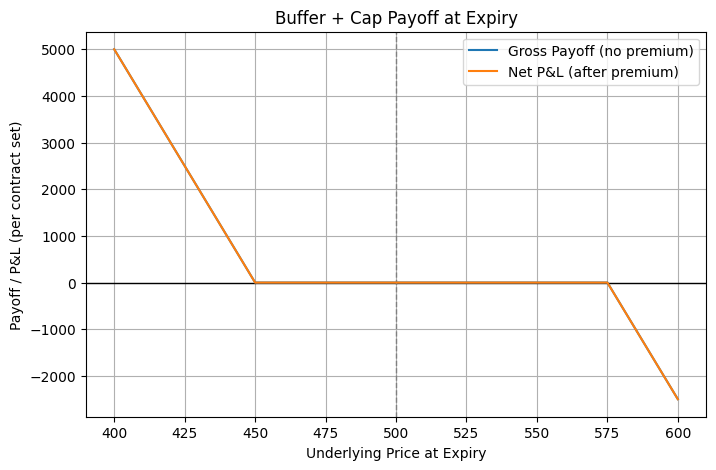

In [16]:
# 4.3 Payoff plot

qty = {1: +1, 2: -1}  
mult = 100

def leg_payoff(S, K, cp, q, mult=100):
    if cp == "Put":
        base = np.maximum(K - S, 0.0)     
    else:  # "Call"
        base = np.maximum(S - K, 0.0)     
    return q * mult * base                 

S0 = float(calc_df["uPrc"].iloc[0])
S = np.linspace(S0*0.8, S0*1.2, 201)

payoff = np.zeros_like(S)
for _, r in calc_df.iterrows():
    q = qty.get(int(r["okeyNumber"]), 0)
    payoff += leg_payoff(S, float(r["strike"]), r["cp"], q, mult)

net_premium = float((calc_df["price"] * calc_df["okeyNumber"].map(qty).fillna(0) * mult).sum())
pnl = payoff - net_premium

plt.figure(figsize=(8,5))
plt.axhline(0, lw=1, color="black")
plt.axvline(S0, lw=1, ls="--", color="gray")
plt.plot(S, payoff, label="Gross Payoff (no premium)")
plt.plot(S, pnl, label="Net P&L (after premium)")
plt.title("Buffer + Cap Payoff at Expiry")
plt.xlabel("Underlying Price at Expiry")
plt.ylabel("Payoff / P&L (per contract set)")
plt.legend(); plt.grid(True); plt.show()

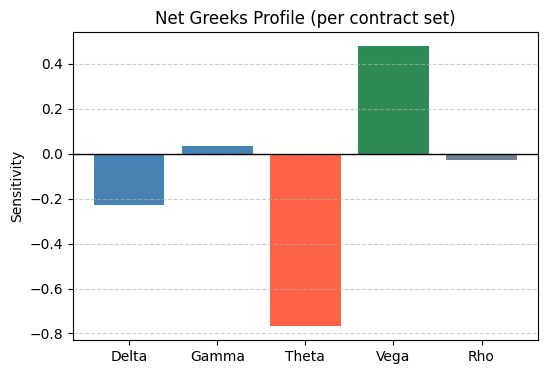

{'Delta': -0.229,
 'Gamma': 0.033,
 'Theta': -0.768,
 'Vega': 0.478,
 'Rho': -0.026000000000000002}

In [17]:
# 4.4 Greek profile

calc_df["qty"] = calc_df["okeyNumber"].map(qty).fillna(0)

mult = 100  

def agg(col):
    return float((calc_df[col] * calc_df["qty"] * mult).sum())

net_greeks = {
    "Delta": agg("delta"),
    "Gamma": agg("gamma"),
    "Theta": agg("theta"),
    "Vega":  agg("vega"),
    "Rho":   agg("rho"),
}

plt.figure(figsize=(6,4))
bars = plt.bar(net_greeks.keys(), net_greeks.values(), color=["steelblue","steelblue","tomato","seagreen","slategray"])
plt.axhline(0, color="black", lw=1)
plt.title("Net Greeks Profile (per contract set)")
plt.ylabel("Sensitivity")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

net_greeks